# Credit Score

## Project Description

## Import Libraries and Dataset

In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

#Display all columns
pd.set_option('display.max_columns', 999)
#pd.get_option("display.max_rows")
#pd.set_option('max_colwidth', 100)

In [14]:
train_df = pd.read_csv('Train.csv')
train_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Checking Na values
train_df.isna().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [16]:
#Checking Unique values
train_df.nunique()

CustomerId                421
TransactionStartTime     1606
Value                      98
Amount                     77
TransactionId            1758
BatchId                  1713
SubscriptionId              6
CurrencyCode                1
CountryCode                 1
ProviderId                  1
ProductId                  16
ProductCategory             7
ChannelId                   1
TransactionStatus           2
IssuedDateLoan           1101
AmountLoan                647
Currency                    1
LoanId                   1159
PaidOnDate               1427
IsFinalPayBack              2
InvestorId                  3
DueDate                  1101
LoanApplicationId        1156
PayBackId                1485
ThirdPartyId             1481
IsThirdPartyConfirmed       2
IsDefaulted                 2
dtype: int64

## Defaulted caracteristics

In [29]:
#Select only defaulted
df_defaulted = train_df[(train_df['IsDefaulted'] == 1)]
#Group defaulted customer by CustomerId
groupby_CustomerId = df_defaulted.groupby('CustomerId').sum()
len(groupby_CustomerId)

69

In [49]:
#Defaulted loans caracteristics
groupby_CustomerId.AmountLoan.describe()

count        69.000000
mean      47164.202899
std       48226.195458
min         500.000000
25%        5000.000000
50%       35000.000000
75%       64000.000000
max      192000.000000
Name: AmountLoan, dtype: float64

In [31]:
#Checking number of loans per defaulted customer
df_defaulted.nunique()

CustomerId                69
TransactionStartTime      53
Value                     12
Amount                    11
TransactionId             71
BatchId                   71
SubscriptionId             3
CurrencyCode               1
CountryCode                1
ProviderId                 1
ProductId                  6
ProductCategory            4
ChannelId                  1
TransactionStatus          1
IssuedDateLoan            53
AmountLoan                42
Currency                   1
LoanId                    71
PaidOnDate               177
IsFinalPayBack             2
InvestorId                 2
DueDate                   54
LoanApplicationId         71
PayBackId                178
ThirdPartyId             175
IsThirdPartyConfirmed      2
IsDefaulted                1
dtype: int64

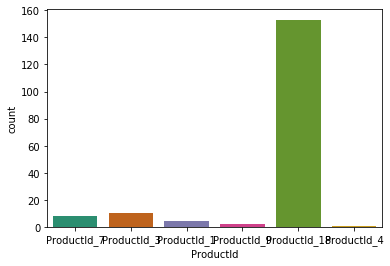

In [32]:
#Visualising Most defaulted loans products
m = sns.countplot(data=df_defaulted, x = 'ProductId', palette='Dark2')

In [35]:
#Visualising defaulted values grouped by loan products
groupby_ProductId = df_defaulted.groupby('ProductId').sum()
groupby_ProductId

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
ProductId,,,,,,,,
ProductId_1,36000.0,-36000.0,1024,4,6780.0,0.0,4.0,4.0
ProductId_18,35976000.0,-35976000.0,39168,153,3202500.0,2.0,152.0,153.0
ProductId_3,49000.0,-49000.0,2560,10,19790.0,0.0,10.0,10.0
ProductId_4,5000.0,-5000.0,256,1,900.0,0.0,1.0,1.0
ProductId_7,74998.0,-74998.0,2048,8,17695.0,1.0,7.0,8.0
ProductId_9,25790.0,-23000.0,512,2,6665.0,0.0,2.0,2.0


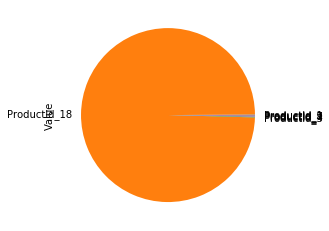

In [43]:
#Most defaulted productID VAlue
groupby_ProductId.Value.plot(kind='pie')

In [44]:
groupby_ProductCategory = df_defaulted.groupby('ProductCategory').sum()

In [45]:
groupby_ProductCategory

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
ProductCategory,,,,,,,,
airtime,159998.0,-159998.0,5632,22,44265.0,1.0,21.0,22.0
data_bundles,5000.0,-5000.0,256,1,900.0,0.0,1.0,1.0
retail,35976000.0,-35976000.0,39168,153,3202500.0,2.0,152.0,153.0
utility_bill,25790.0,-23000.0,512,2,6665.0,0.0,2.0,2.0


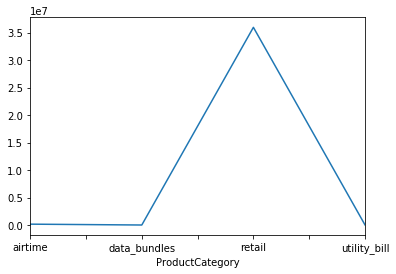

In [47]:
groupby_ProductCategory.Value.plot()

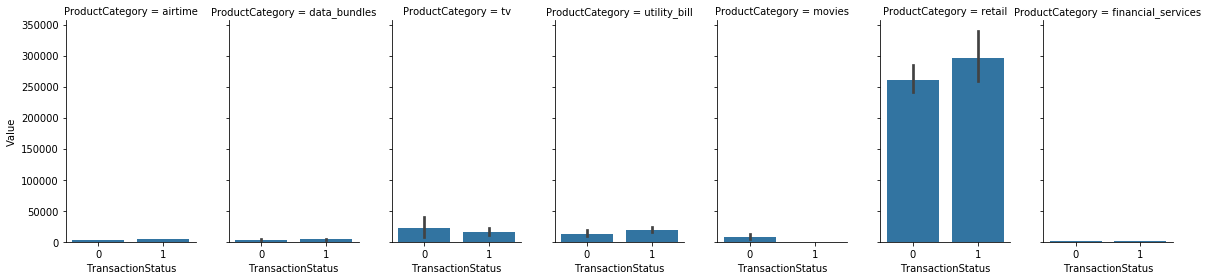

In [52]:
#Number of transaction fail/Succeded per Product Category
g = sns.FacetGrid(train_df, col="ProductCategory", height=4, aspect=.6)
g.map(sns.barplot, "TransactionStatus", "Value");

In [66]:
#Top 10 default customer
defaulted_customer = df_defaulted.groupby('CustomerId').sum()
defaulted_customer.sort_values('TransactionStatus').tail(10)

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
CustomerId,,,,,,,,
CustomerId_467,1710000.0,-1710000.0,1280,5,80000.0,0.0,5.0,5.0
CustomerId_284,960000.0,-960000.0,1280,5,96000.0,0.0,5.0,5.0
CustomerId_169,1152000.0,-1152000.0,1536,6,121000.0,0.0,6.0,6.0
CustomerId_32,1152000.0,-1152000.0,1536,6,114000.0,0.0,6.0,6.0
CustomerId_366,2052000.0,-2052000.0,1536,6,112000.0,0.0,6.0,6.0
CustomerId_312,2052000.0,-2052000.0,1536,6,97000.0,0.0,6.0,6.0
CustomerId_10,1344000.0,-1344000.0,1792,7,97000.0,0.0,7.0,7.0
CustomerId_116,1536000.0,-1536000.0,2048,8,128000.0,0.0,7.0,8.0
CustomerId_42,3078000.0,-3078000.0,2304,9,162000.0,0.0,9.0,9.0
